<a href="https://colab.research.google.com/github/sateeshfrnd/Generative-AI/blob/main/notebooks/Word2Vec/Skip_Gram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skip-Gram

## import required Libraries

In [2]:
from gensim.models import Word2Vec


In [3]:
# Define the corpus
sentences = [
    ["she", "enjoys", "baking", "cookies"],
    ["he", "loves", "drinking", "coffee"],
    ["they", "are", "enjoying", "baking", "bread", "together"],
    ["i", "like", "drinking", "tea"]
]

In [4]:
# Train Skip-Gram model (sg=1 for Skip-Gram)
skip_gram_model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, sg=1)

In [5]:
skip_gram_model.wv["baking"]

array([-0.01631718,  0.00899317, -0.00827343,  0.00164891,  0.01699807,
       -0.00892597,  0.00903383, -0.01357495, -0.00709714,  0.01879599,
       -0.00315432,  0.00064175, -0.0082812 , -0.01536477, -0.00301635,
        0.00493932, -0.00177614,  0.01106888, -0.00548714,  0.00451989,
        0.01091195,  0.01669312, -0.00290789, -0.01841763,  0.00874188,
        0.00114466,  0.01488433, -0.00162573, -0.00527712, -0.01750612,
       -0.00171212,  0.00565235,  0.01080278,  0.01410581, -0.01140676,
        0.00371772,  0.01217877, -0.00959477, -0.00621502,  0.01359621,
        0.00326351,  0.00037935,  0.00694688,  0.00043619,  0.01923816,
        0.01012104, -0.01783513, -0.01408298,  0.00180393,  0.01278517],
      dtype=float32)

In [7]:
skip_gram_model.wv.most_similar("baking")

[('i', 0.12487471848726273),
 ('he', 0.080597423017025),
 ('bread', 0.0740012377500534),
 ('drinking', 0.0423797108232975),
 ('together', 0.01828855834901333),
 ('enjoys', 0.011410432867705822),
 ('tea', 0.011107245460152626),
 ('they', 0.0013962482335045934),
 ('cookies', -0.012004428543150425),
 ('she', -0.03441796451807022)]

### Words Closer to 'baking'
- "i" (0.1248): This word shows up in the training corpus and may have been placed close to "baking" due to the lack of strong semantic distinctions in a small dataset.

- "bread" (0.0740): This makes more sense semantically because "bread" appears in the context of "baking" in the corpus.

- "drinking" (0.0424): Though unrelated to "baking" in meaning, it is likely placed close due to overlaps in how contexts are represented in a small dataset.


### Words Far From 'baking'

- "cookies" (-0.0120): While intuitively related to "baking," the model might not have seen enough examples or diversity in the corpus to establish a strong connection.

- "she" (-0.0344): This is expected, as "she" is more of a general pronoun with little direct connection to "baking."

## Visualize Word Vectors Using PCA

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
# Extract word vectors and corresponding words
word_vectors = []
words = []

for word in skip_gram_model.wv.index_to_key:  # Get all words in the vocabulary
    word_vectors.append(skip_gram_model.wv[word])  # Get the vector for each word
    words.append(word)

In [11]:
str(words)

"['drinking', 'baking', 'tea', 'like', 'i', 'together', 'bread', 'enjoying', 'are', 'they', 'coffee', 'loves', 'he', 'cookies', 'enjoys', 'she']"

In [12]:
word_vectors

[array([-1.0724545e-03,  4.7286271e-04,  1.0206699e-02,  1.8018546e-02,
        -1.8605899e-02, -1.4233618e-02,  1.2917745e-02,  1.7945977e-02,
        -1.0030856e-02, -7.5267432e-03,  1.4761009e-02, -3.0669428e-03,
        -9.0732267e-03,  1.3108104e-02, -9.7203208e-03, -3.6320353e-03,
         5.7531595e-03,  1.9837476e-03, -1.6570430e-02, -1.8897636e-02,
         1.4623532e-02,  1.0140524e-02,  1.3515387e-02,  1.5257311e-03,
         1.2701781e-02, -6.8107317e-03, -1.8928028e-03,  1.1537147e-02,
        -1.5043275e-02, -7.8722071e-03, -1.5023164e-02, -1.8600845e-03,
         1.9076237e-02, -1.4638334e-02, -4.6675373e-03, -3.8754821e-03,
         1.6154874e-02, -1.1861792e-02,  9.0324880e-05, -9.5074680e-03,
        -1.9207101e-02,  1.0014586e-02, -1.7519170e-02, -8.7836506e-03,
        -7.0199967e-05, -5.9236289e-04, -1.5322480e-02,  1.9229487e-02,
         9.9641159e-03,  1.8466286e-02], dtype=float32),
 array([-0.01631718,  0.00899317, -0.00827343,  0.00164891,  0.01699807,
      

In [13]:
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

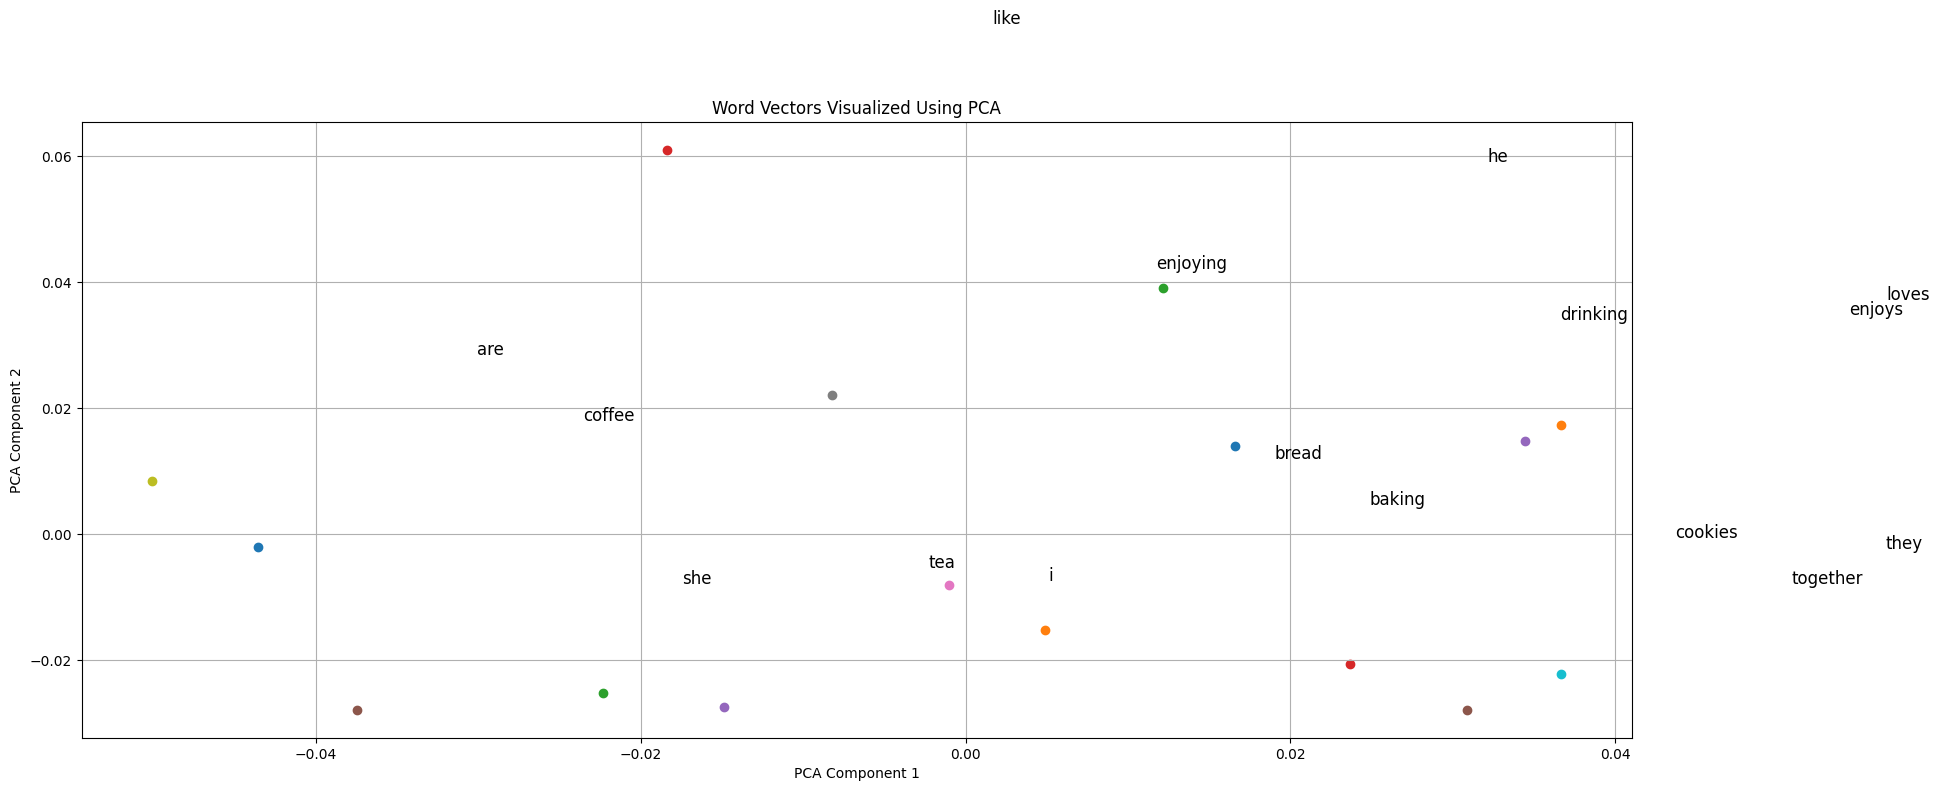

In [15]:
# Plot the vectors
plt.figure(figsize=(12, 8))
for i, word in enumerate(words):
    x, y = word_vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)  # Annotate with words

plt.title("Word Vectors Visualized Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

## Limitations of the Small Corpus

- The corpus provided is small, and Word2Vec typically performs better with a large dataset that captures diverse word relationships. In a small dataset:

- The co-occurrence patterns may not be representative enough.
Semantic relationships (like "baking" → "cookies") may not emerge due to insufficient examples.